In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline
import random
from typing import *
import torch

# from quickgrad.core import vector
# from quickgrad.nn._module import Module
# from quickgrad.nn._activations import *
# from quickgrad.nn.linear import *
# from quickgrad.nn._activations import softmax
# from quickgrad.nn.dropout import *

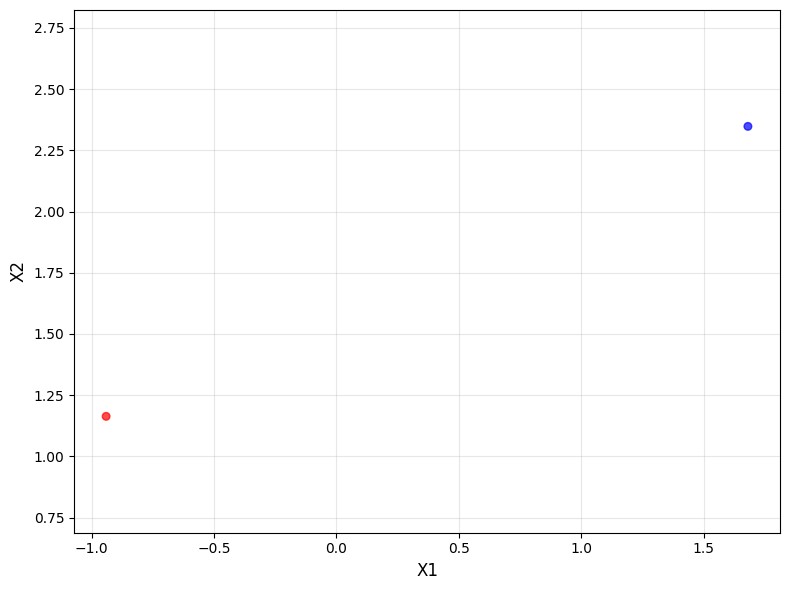

In [2]:
np.random.seed(42)

n_samples = 3

def make_circles(n_samples):
    n_inner = n_samples // 2
    n_outer = n_samples // 2
    
    # Inner circle (class 0)
    theta_inner = np.random.uniform(0, 2*np.pi, n_inner)
    r_inner = np.random.uniform(0.0, 1.5, n_inner)
    x_inner = r_inner * np.cos(theta_inner) + np.random.normal(0, 0.1, n_inner)
    y_inner = r_inner * np.sin(theta_inner) + np.random.normal(0, 0.1, n_inner)
    
    # Outer circle (class 1)
    theta_outer = np.random.uniform(0, 2*np.pi, n_outer)
    r_outer = np.random.uniform(2.5, 4.0, n_outer)
    x_outer = r_outer * np.cos(theta_outer) + np.random.normal(0, 0.1, n_outer)
    y_outer = r_outer * np.sin(theta_outer) + np.random.normal(0, 0.1, n_outer)
    
    X = np.column_stack([np.concatenate([x_inner, x_outer]), 
                         np.concatenate([y_inner, y_outer])])
    y = np.concatenate([np.zeros(n_inner), np.ones(n_outer)])
    return X, y

# Generate the circles dataset
X, y = make_circles(n_samples)

# Create single plot
plt.figure(figsize=(8, 6))
colors = ['red' if label == 0 else 'blue' for label in y]
plt.scatter(X[:, 0], X[:, 1], c=colors, alpha=0.7, s=30)
# plt.title('Concentric Circles Classification Dataset\n(Red=0, Blue=1)', fontsize=14, fontweight='bold')
plt.xlabel('X1', fontsize=12)
plt.ylabel('X2', fontsize=12)
plt.grid(True, alpha=0.3)
plt.axis('equal')  # Make circles look circular
plt.tight_layout()
plt.show()



In [3]:
# Print dataset information
# print("Concentric Circles Classification Dataset:")
# print("=" * 50)
# print(f"X shape: {X.shape} (features: X1, X2)")
# print(f"y shape: {y.shape} (labels: 0 or 1)")
# print(f"Class 0 (inner circle) count: {np.sum(y == 0)}")
# print(f"Class 1 (outer circle) count: {np.sum(y == 1)}")
# print(f"X range: [{X.min():.2f}, {X.max():.2f}]")

# print(f"\nFirst 10 samples:")
# print("X1\t\tX2\t\tLabel")
# print("-" * 30)
# for i in range(10):
#     print(f"{X[i,0]:.3f}\t\t{X[i,1]:.3f}\t\t{int(y[i])}")

# print(f"\nFor neural network training:")
# print(f"Input features: X.shape = {X.shape}")
# print(f"Target labels: y.shape = {y.shape}")
# print(f"Each sample has 2 features [x1, x2] and 1 binary label (0 or 1)")

# # Ready to use variables
# print(f"\nDataset ready for training:")
# print(f"X = input features (shape: {X.shape})")
# print(f"y = target labels (shape: {y.shape})")

In [168]:
X.shape, y.shape

((2, 2), (2,))

In [4]:
from quickgrad import vector, optim
import quickgrad.nn as nn
from quickgrad.nn._losses import *
from quickgrad.nn.linear import Linear
import numpy as np
from quickgrad.nn._acts_modules import Sigmoid

In [5]:
in_feats, out_feats = 2, 1

model = nn.Sequential()
model.append(nn.Linear(in_feats, out_feats))
model.append(nn.Sigmoid())
# model = nn.Sequential(
#     nn.Linear(in_feats, out_feats),
#     # nn.ReLU(),
#     # nn.Linear(5, 10),
#     # nn.ReLU(),
#     # nn.Linear(10, out_feats),
#     nn.Sigmoid()    
# )

# l1 = nn.Linear(in_feats, out_feats)
# sig = nn.Sigmoid()
# final_mode = []
# final_mode.append(l1)
# final_mode.append(sig)
# len(model.parameters())

In [6]:
from quickgrad import vector, optim
import quickgrad.nn as nn
from quickgrad.nn._losses import *
from quickgrad.nn.linear import Linear
import numpy as np
from quickgrad.nn._acts_modules import Sigmoid

In [7]:
class BCELoss(Module):
    def __init__(self, reduction='mean', eps=1e-7):
        self.reduction = reduction
        self.eps = eps
    
    def forward(self, y_pred, y):
        # Ensure numerical stability
        eps_vec = vector(self.eps)
        one_vec = vector(1.0)
        
        # Clamp predictions: max(eps, min(1-eps, y_pred))
        y_pred_safe = y_pred.clamp(self.eps, 1.0 - self.eps)  # You need to implement clamp
        
        # Or manually:
        # y_pred_safe = vector(np.clip(y_pred.data, self.eps, 1 - self.eps))
        
        # BCE = -[y*log(p) + (1-y)*log(1-p)]
        pos_loss = y * y_pred_safe.log()
        neg_loss = (one_vec - y) * (one_vec - y_pred_safe).log()
        
        bce = -(pos_loss + neg_loss)
        
        if self.reduction == 'mean':
            return bce.mean()  # Use mean() method instead of manual division
        elif self.reduction == 'sum':
            return bce.sum()
        else:
            return bce
        
bce_loss = BCELoss()

In [144]:
sig = nn.Sigmoid()
ll = nn.Linear(2, 3)
new_model = nn.Sequential()
new_model.append(ll)
new_model.append(sig)
opt = optim.Adam(new_model.parameters(), lr=0.001)
xx = vector(np.random.randn(32, 2))
y_train = vector(np.random.randn(32, 3))
y = new_model.forward(xx)
loss = bce_loss.forward(y_train, y)
opt.zero_grad()
loss.backward()
ll.w.grad

abc
abc
bcd


array([[-0.32710222, -0.0944376 ],
       [ 0.06032619, -0.0146282 ],
       [-0.09910513,  0.33492625]])

In [156]:
X, y = make_circles(10)

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.]])

In [160]:
y_train.shape()

(10,)

In [164]:
X, y = make_circles(10)
y = np.expand_dims(y,-1)
X_train = vector(X.tolist())
y_train = vector(y.tolist())

sig = nn.Sigmoid()
ll = nn.Linear(2, 1)
new_model = nn.Sequential()
new_model.append(ll)
new_model.append(sig)
opt = optim.Adam(new_model.parameters(), lr=0.001)
X_train = vector(X.tolist())
y_train = vector(y.tolist())
y = new_model.forward(X_train)
loss = bce_loss.forward(y_train, y)
opt.zero_grad()
loss.backward()
ll.w.grad

abc
abc
bcd


array([[-0.25586001,  2.39552934]])

In [ ]:
sig = nn.Sigmoid()
ll = nn.Linear(2, 1)
new_model = nn.Sequential()
new_model.append(ll)
new_model.append(sig)
opt = optim.Adam(model.parameters(), lr=0.001)
xx = vector(np.random.randn(32, 2))
# y = sig.forward(ll.forward(xx))
X, y = make_circles(10)

# X_train = vector(X.tolist())
# y_train = vector(y.tolist())
# y = new_model.forward(X_train).reshape(-1)
y_train = vector(np.random.randn(32, 3))
loss = bce_loss.forward(y_train, y)

abc
abc


In [ ]:
model.forward(X_train)

abc
abc


(10, 1)

In [107]:
xx.shape()

(32, 2)

In [108]:
X_train.shape()

(2, 2)

In [99]:
y_train

vector(data=[[-0.53441645 -1.49505387 -0.78925833]
 [ 0.74371128 -0.21216142 -0.42686879]
 [ 0.50144833  1.15818665  0.25711687]
 [ 0.3145129   1.37186213  0.17555329]
 [-0.30928855  0.6731255  -0.25663018]
 [-0.36782572  1.27373362 -0.29195267]
 [-2.65517605  0.34551794 -0.39551645]
 [-0.28913686  0.45293633 -0.16606091]
 [ 0.21493883 -2.02231493 -0.94305681]
 [ 1.40395874 -0.0185508  -1.67350462]
 [-1.07253183 -0.99258618  0.10234768]
 [-0.43260928 -0.6591823   0.0039373 ]
 [ 0.4777541  -0.25902864 -0.57470921]
 [-0.42149822  0.33982096 -0.00738015]
 [ 0.76729684 -1.14979258 -0.77533611]
 [ 0.77314086 -0.80182784  1.38401572]
 [ 1.40520531  1.39232575 -0.88064082]
 [ 0.07689495 -0.49343248  0.92316261]
 [ 1.70660495  0.87358942  0.00914435]
 [-0.3655393   0.64908673 -1.22287354]
 [ 0.53633603 -0.91469093  0.62054822]
 [-0.16093738 -0.3882644  -0.88551237]
 [-0.35674503  0.5561218   1.04386061]
 [ 0.52644816  1.36388652  2.53916272]
 [-0.32449096 -0.20586672 -1.44004145]
 [ 1.19072726

In [139]:
ll.w.grad

array([[0., 0.]])

array([[0., 0.]])

(10,)

In [8]:
X, y = make_circles(10)
y = np.expand_dims(y, -1)

X_train = vector(X.tolist())
y_train = vector(y.tolist())

print("Training data: ", X_train)
print("Training data shape: ", X_train.shape)
print("Labels: ", y_train)
print("Labels shape: ", y_train.shape)

Training data:  vector(data=[[ 8.15557666e-02  6.69285594e-01]
 [-3.25075715e-02  4.09596669e-01]
 [ 3.09971995e-01  7.87056442e-01]
 [-1.01676176e-02  1.37180477e-01]
 [-1.76977396e-01  2.68542085e-02]
 [ 2.36382018e+00  1.31110078e+00]
 [-1.43227909e+00 -3.46137973e+00]
 [-2.66450617e+00  1.00681866e+00]
 [ 2.60419756e+00  2.28941112e+00]
 [-3.06711261e+00  1.85733871e-03]])
Training data shape:  <bound method vector.shape of vector(data=[[ 8.15557666e-02  6.69285594e-01]
 [-3.25075715e-02  4.09596669e-01]
 [ 3.09971995e-01  7.87056442e-01]
 [-1.01676176e-02  1.37180477e-01]
 [-1.76977396e-01  2.68542085e-02]
 [ 2.36382018e+00  1.31110078e+00]
 [-1.43227909e+00 -3.46137973e+00]
 [-2.66450617e+00  1.00681866e+00]
 [ 2.60419756e+00  2.28941112e+00]
 [-3.06711261e+00  1.85733871e-03]])>
Labels:  vector(data=[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]])
Labels shape:  <bound method vector.shape of vector(data=[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]])>


In [10]:
lr = 0.1
epochs = 450

loss_fn = nn.BCELoss()
from quickgrad import vector, optim
opt = optim.Adam(model.parameters(), lr=lr)

In [11]:
example_output = model.forward(X_train)
example_output.reshape(-1)

abc
abc


vector(data=[0.56841929 0.55182771 0.55508554 0.5173273  0.52434692 0.37351823
 0.28092466 0.85201832 0.45693798 0.81325401])

In [14]:
import tqdm
import time

loop = tqdm.tqdm(range(epochs))
losses = []

bce_loss = BCELoss()

start = time.time()
for epoch in loop:
    X_train.requires_grad = False
    # y_train.requires_grad = False
    y_pred = model.forward(X_train)#.reshape(-1)
    print(y_pred.shape())
    print(y_train.shape())
    loss = bce_loss.forward(y_train, y_pred)
    print(loss)
    opt.zero_grad()
    loss.backward()

    for t in model.parameters():
        print(t.grad)
    opt.step()

    lossval = loss.data.item()

    losses.append(lossval)
    loop.set_postfix(loss=lossval)
    

end = time.time()
print(f"Finished training in {end - start} seconds...")

  4%|▎         | 16/450 [00:00<00:02, 158.94it/s, loss=5.65]

abc
abc
(10, 1)
(10, 1)
vector(data=[[7.96290918]])
bcd
[[-0.10707519  0.31897895]]
[0.]
[[-0.10707519  0.31897895]]
[[ 0.09999999 -0.1       ]]
[0.]
[-0.]
abc
abc
(10, 1)
(10, 1)
vector(data=[[7.93404767]])
bcd
[[0.20067535 0.34749877]]
[0.]
[[0.20067535 0.34749877]]
[[-0.03412888 -0.10013144]]
[0.]
[-0.]
abc
abc
(10, 1)
(10, 1)
vector(data=[[7.88015134]])
bcd
[[0.30743561 0.55243468]]
[0.]
[[0.30743561 0.55243468]]
[[-0.06705007 -0.0988358 ]]
[0.]
[-0.]
abc
abc
(10, 1)
(10, 1)
vector(data=[[7.79131263]])
bcd
[[0.39847708 0.7559914 ]]
[0.]
[[0.39847708 0.7559914 ]]
[[-0.07995833 -0.09799046]]
[0.]
[-0.]
abc
abc
(10, 1)
(10, 1)
vector(data=[[7.67485979]])
bcd
[[0.47862225 0.88528396]]
[0.]
[[0.47862225 0.88528396]]
[[-0.08679635 -0.09846938]]
[0.]
[-0.]
abc
abc
(10, 1)
(10, 1)
vector(data=[[7.54126133]])
bcd
[[0.52764193 0.92059902]]
[0.]
[[0.52764193 0.92059902]]
[[-0.09121372 -0.09956333]]
[0.]
[-0.]
abc
abc
(10, 1)
(10, 1)
vector(data=[[7.40196652]])
bcd
[[0.53878192 0.88699524]]
[0

 14%|█▍        | 64/450 [00:00<00:02, 157.91it/s, loss=5.14]

abc
abc
(10, 1)
(10, 1)
vector(data=[[5.62464591]])
bcd
[[0.01000353 0.36412793]]
[0.]
[[0.01000353 0.36412793]]
[[-0.0310965 -0.0795582]]
[0.]
[-0.]
abc
abc
(10, 1)
(10, 1)
vector(data=[[5.59584157]])
bcd
[[0.0077195 0.3531146]]
[0.]
[[0.0077195 0.3531146]]
[[-0.0286231  -0.07825086]]
[0.]
[-0.]
abc
abc
(10, 1)
(10, 1)
vector(data=[[5.56843141]])
bcd
[[0.00586055 0.34254839]]
[0.]
[[0.00586055 0.34254839]]
[[-0.02629832 -0.07694135]]
[0.]
[-0.]
abc
abc
(10, 1)
(10, 1)
vector(data=[[5.54233261]])
bcd
[[0.0043952  0.33240923]]
[0.]
[[0.0043952  0.33240923]]
[[-0.02412294 -0.07563299]]
[0.]
[-0.]
abc
abc
(10, 1)
(10, 1)
vector(data=[[5.51746876]])
bcd
[[0.00329607 0.3226761 ]]
[0.]
[[0.00329607 0.3226761 ]]
[[-0.0220972  -0.07432872]]
[0.]
[-0.]
abc
abc
(10, 1)
(10, 1)
vector(data=[[5.49376941]])
bcd
[[0.00253916 0.31332756]]
[0.]
[[0.00253916 0.31332756]]
[[-0.02022088 -0.07303115]]
[0.]
[-0.]
abc
abc
(10, 1)
(10, 1)
vector(data=[[5.47116954]])
bcd
[[0.00210312 0.30434232]]
[0.]
[[0.002

 18%|█▊        | 81/450 [00:00<00:02, 158.63it/s, loss=4.97]

vector(data=[[5.13051134]])
bcd
[[0.03685696 0.1568932 ]]
[0.]
[[0.03685696 0.1568932 ]]
[[-0.01495194 -0.044383  ]]
[0.]
[-0.]
abc
abc
(10, 1)
(10, 1)
vector(data=[[5.12305986]])
bcd
[[0.03709594 0.15398357]]
[0.]
[[0.03709594 0.15398357]]
[[-0.01551484 -0.04364109]]
[0.]
[-0.]
abc
abc
(10, 1)
(10, 1)
vector(data=[[5.11582388]])
bcd
[[0.037126   0.15125203]]
[0.]
[[0.037126   0.15125203]]
[[-0.01603987 -0.04292817]]
[0.]
[-0.]
abc
abc
(10, 1)
(10, 1)
vector(data=[[5.10879195]])
bcd
[[0.03695789 0.14868959]]
[0.]
[[0.03695789 0.14868959]]
[[-0.01651986 -0.04224451]]
[0.]
[-0.]
abc
abc
(10, 1)
(10, 1)
vector(data=[[5.10195395]])
bcd
[[0.03660562 0.14628626]]
[0.]
[[0.03660562 0.14628626]]
[[-0.01694887 -0.04159017]]
[0.]
[-0.]
abc
abc
(10, 1)
(10, 1)
vector(data=[[5.09530092]])
bcd
[[0.03608584 0.14403128]]
[0.]
[[0.03608584 0.14403128]]
[[-0.01732222 -0.04096508]]
[0.]
[-0.]
abc
abc
(10, 1)
(10, 1)
vector(data=[[5.08882491]])
bcd
[[0.03541718 0.14191337]]
[0.]
[[0.03541718 0.14191337]]

 25%|██▌       | 114/450 [00:00<00:02, 159.10it/s, loss=4.87]

abc
abc
(10, 1)
(10, 1)
vector(data=[[4.95810224]])
bcd
[[0.0147276  0.10442833]]
[0.]
[[0.0147276  0.10442833]]
[[-0.01207323 -0.03129963]]
[0.]
[-0.]
abc
abc
(10, 1)
(10, 1)
vector(data=[[4.95467363]])
bcd
[[0.01465121 0.10332485]]
[0.]
[[0.01465121 0.10332485]]
[[-0.01187707 -0.03109747]]
[0.]
[-0.]
abc
abc
(10, 1)
(10, 1)
vector(data=[[4.95130378]])
bcd
[[0.01460316 0.10223318]]
[0.]
[[0.01460316 0.10223318]]
[[-0.01170089 -0.03089736]]
[0.]
[-0.]
abc
abc
(10, 1)
(10, 1)
vector(data=[[4.94799102]])
bcd
[[0.01457914 0.10115431]]
[0.]
[[0.01457914 0.10115431]]
[[-0.01154432 -0.03069915]]
[0.]
[-0.]
abc
abc
(10, 1)
(10, 1)
vector(data=[[4.94473377]])
bcd
[[0.01457492 0.10008925]]
[0.]
[[0.01457492 0.10008925]]
[[-0.01140679 -0.03050275]]
[0.]
[-0.]
abc
abc
(10, 1)
(10, 1)
vector(data=[[4.94153051]])
bcd
[[0.01458639 0.09903895]]
[0.]
[[0.01458639 0.09903895]]
[[-0.01128753 -0.0303081 ]]
[0.]
[-0.]
abc
abc
(10, 1)
(10, 1)
vector(data=[[4.93837976]])
bcd
[[0.01460963 0.09800436]]
[0.]
[

 33%|███▎      | 148/450 [00:01<00:01, 160.03it/s, loss=4.81]

abc
abc
(10, 1)
(10, 1)
vector(data=[[4.86892336]])
bcd
[[0.0129266  0.07693156]]
[0.]
[[0.0129266  0.07693156]]
[[-0.01054836 -0.02582854]]
[0.]
[-0.]
abc
abc
(10, 1)
(10, 1)
vector(data=[[4.86680821]])
bcd
[[0.01277371 0.07635738]]
[0.]
[[0.01277371 0.07635738]]
[[-0.01049752 -0.0257088 ]]
[0.]
[-0.]
abc
abc
(10, 1)
(10, 1)
vector(data=[[4.86471913]])
bcd
[[0.01262284 0.07579183]]
[0.]
[[0.01262284 0.07579183]]
[[-0.01044371 -0.02559138]]
[0.]
[-0.]
abc
abc
(10, 1)
(10, 1)
vector(data=[[4.86265561]])
bcd
[[0.01247479 0.0752344 ]]
[0.]
[[0.01247479 0.0752344 ]]
[[-0.01038733 -0.02547616]]
[0.]
[-0.]
abc
abc
(10, 1)
(10, 1)
vector(data=[[4.86061711]])
bcd
[[0.01233025 0.0746846 ]]
[0.]
[[0.01233025 0.0746846 ]]
[[-0.01032881 -0.02536303]]
[0.]
[-0.]
abc
abc
(10, 1)
(10, 1)
vector(data=[[4.85860314]])
bcd
[[0.0121898 0.074142 ]]
[0.]
[[0.0121898 0.074142 ]]
[[-0.01026857 -0.02525188]]
[0.]
[-0.]
abc
abc
(10, 1)
(10, 1)
vector(data=[[4.85661322]])
bcd
[[0.01205392 0.07360622]]
[0.]
[[0.0

 40%|████      | 182/450 [00:01<00:01, 160.90it/s, loss=4.77]

abc
abc
(10, 1)
(10, 1)
vector(data=[[4.8105123]])
bcd
[[0.00993293 0.06121109]]
[0.]
[[0.00993293 0.06121109]]
[[-0.00894602 -0.02263178]]
[0.]
[-0.]
abc
abc
(10, 1)
(10, 1)
vector(data=[[4.80904275]])
bcd
[[0.00987662 0.06082523]]
[0.]
[[0.00987662 0.06082523]]
[[-0.00891844 -0.02255094]]
[0.]
[-0.]
abc
abc
(10, 1)
(10, 1)
vector(data=[[4.80758755]])
bcd
[[0.00981988 0.06044438]]
[0.]
[[0.00981988 0.06044438]]
[[-0.00889128 -0.02247092]]
[0.]
[-0.]
abc
abc
(10, 1)
(10, 1)
vector(data=[[4.80614648]])
bcd
[[0.0097627  0.06006846]]
[0.]
[[0.0097627  0.06006846]]
[[-0.00886442 -0.02239173]]
[0.]
[-0.]
abc
abc
(10, 1)
(10, 1)
vector(data=[[4.80471932]])
bcd
[[0.00970506 0.05969739]]
[0.]
[[0.00970506 0.05969739]]
[[-0.00883775 -0.02231337]]
[0.]
[-0.]
abc
abc
(10, 1)
(10, 1)
vector(data=[[4.80330585]])
bcd
[[0.009647   0.05933108]]
[0.]
[[0.009647   0.05933108]]
[[-0.00881119 -0.02223583]]
[0.]
[-0.]
abc
abc
(10, 1)
(10, 1)
vector(data=[[4.80190586]])
bcd
[[0.00958855 0.05896943]]
[0.]
[[

 48%|████▊     | 216/450 [00:01<00:01, 160.92it/s, loss=4.74]

abc
abc
(10, 1)
(10, 1)
vector(data=[[4.76853638]])
bcd
[[0.00812739 0.05061253]]
[0.]
[[0.00812739 0.05061253]]
[[-0.0080452  -0.02036004]]
[0.]
[-0.]
abc
abc
(10, 1)
(10, 1)
vector(data=[[4.76744343]])
bcd
[[0.00808327 0.05034507]]
[0.]
[[0.00808327 0.05034507]]
[[-0.00802007 -0.02030154]]
[0.]
[-0.]
abc
abc
(10, 1)
(10, 1)
vector(data=[[4.76635938]])
bcd
[[0.00803981 0.05008016]]
[0.]
[[0.00803981 0.05008016]]
[[-0.00799529 -0.02024351]]
[0.]
[-0.]
abc
abc
(10, 1)
(10, 1)
vector(data=[[4.76528413]])
bcd
[[0.00799695 0.04981778]]
[0.]
[[0.00799695 0.04981778]]
[[-0.00797087 -0.02018594]]
[0.]
[-0.]
abc
abc
(10, 1)
(10, 1)
vector(data=[[4.76421757]])
bcd
[[0.00795467 0.0495579 ]]
[0.]
[[0.00795467 0.0495579 ]]
[[-0.0079468  -0.02012881]]
[0.]
[-0.]
abc
abc
(10, 1)
(10, 1)
vector(data=[[4.76315957]])
bcd
[[0.00791292 0.0493005 ]]
[0.]
[[0.00791292 0.0493005 ]]
[[-0.00792307 -0.02007213]]
[0.]
[-0.]
abc
abc
(10, 1)
(10, 1)
vector(data=[[4.76211003]])
bcd
[[0.00787166 0.04904555]]
[0.]
[

 56%|█████▌    | 250/450 [00:01<00:01, 162.02it/s, loss=4.71]

vector(data=[[4.73661832]])
bcd
[[0.00687598 0.04299019]]
[0.]
[[0.00687598 0.04299019]]
[[-0.00734503 -0.01864832]]
[0.]
[-0.]
abc
abc
(10, 1)
(10, 1)
vector(data=[[4.73576808]])
bcd
[[0.006843   0.04279273]]
[0.]
[[0.006843   0.04279273]]
[[-0.00732622 -0.01860271]]
[0.]
[-0.]
abc
abc
(10, 1)
(10, 1)
vector(data=[[4.73492383]])
bcd
[[0.00681032 0.04259693]]
[0.]
[[0.00681032 0.04259693]]
[[-0.00730751 -0.01855742]]
[0.]
[-0.]
abc
abc
(10, 1)
(10, 1)
vector(data=[[4.7340855]])
bcd
[[0.00677794 0.04240276]]
[0.]
[[0.00677794 0.04240276]]
[[-0.00728892 -0.01851245]]
[0.]
[-0.]
abc
abc
(10, 1)
(10, 1)
vector(data=[[4.73325301]])
bcd
[[0.00674587 0.04221019]]
[0.]
[[0.00674587 0.04221019]]
[[-0.00727045 -0.01846778]]
[0.]
[-0.]
abc
abc
(10, 1)
(10, 1)
vector(data=[[4.73242632]])
bcd
[[0.00671411 0.04201921]]
[0.]
[[0.00671411 0.04201921]]
[[-0.0072521  -0.01842341]]
[0.]
[-0.]
abc
abc
(10, 1)
(10, 1)
vector(data=[[4.73160535]])
bcd
[[0.00668264 0.0418298 ]]
[0.]
[[0.00668264 0.0418298 ]]


 63%|██████▎   | 284/450 [00:01<00:01, 161.27it/s, loss=4.69]

abc
abc
(10, 1)
(10, 1)
vector(data=[[4.7107143]])
bcd
[[0.00590446 0.03709173]]
[0.]
[[0.00590446 0.03709173]]
[[-0.0067728  -0.01725281]]
[0.]
[-0.]
abc
abc
(10, 1)
(10, 1)
vector(data=[[4.71003576]])
bcd
[[0.00587967 0.03694053]]
[0.]
[[0.00587967 0.03694053]]
[[-0.00675785 -0.01721601]]
[0.]
[-0.]
abc
abc
(10, 1)
(10, 1)
vector(data=[[4.70936144]])
bcd
[[0.00585506 0.03679043]]
[0.]
[[0.00585506 0.03679043]]
[[-0.00674298 -0.01717942]]
[0.]
[-0.]
abc
abc
(10, 1)
(10, 1)
vector(data=[[4.70869128]])
bcd
[[0.00583063 0.03664142]]
[0.]
[[0.00583063 0.03664142]]
[[-0.00672819 -0.01714304]]
[0.]
[-0.]
abc
abc
(10, 1)
(10, 1)
vector(data=[[4.70802526]])
bcd
[[0.00580638 0.03649349]]
[0.]
[[0.00580638 0.03649349]]
[[-0.00671349 -0.01710686]]
[0.]
[-0.]
abc
abc
(10, 1)
(10, 1)
vector(data=[[4.70736333]])
bcd
[[0.0057823  0.03634662]]
[0.]
[[0.0057823  0.03634662]]
[[-0.00669886 -0.0170709 ]]
[0.]
[-0.]
abc
abc
(10, 1)
(10, 1)
vector(data=[[4.70670545]])
bcd
[[0.00575839 0.03620081]]
[0.]
[[

 71%|███████   | 320/450 [00:02<00:00, 166.53it/s, loss=4.67]

abc
abc
(10, 1)
(10, 1)
vector(data=[[4.69034696]])
bcd
[[0.00517408 0.03262281]]
[0.]
[[0.00517408 0.03262281]]
[[-0.00632041 -0.01613905]]
[0.]
[-0.]
abc
abc
(10, 1)
(10, 1)
vector(data=[[4.68978879]])
bcd
[[0.00515447 0.03250229]]
[0.]
[[0.00515447 0.03250229]]
[[-0.00630793 -0.01610819]]
[0.]
[-0.]
abc
abc
(10, 1)
(10, 1)
vector(data=[[4.68923375]])
bcd
[[0.005135   0.03238255]]
[0.]
[[0.005135   0.03238255]]
[[-0.00629551 -0.01607749]]
[0.]
[-0.]
abc
abc
(10, 1)
(10, 1)
vector(data=[[4.68868181]])
bcd
[[0.00511565 0.03226357]]
[0.]
[[0.00511565 0.03226357]]
[[-0.00628315 -0.01604693]]
[0.]
[-0.]
abc
abc
(10, 1)
(10, 1)
vector(data=[[4.68813295]])
bcd
[[0.00509643 0.03214535]]
[0.]
[[0.00509643 0.03214535]]
[[-0.00627086 -0.01601652]]
[0.]
[-0.]
abc
abc
(10, 1)
(10, 1)
vector(data=[[4.68758713]])
bcd
[[0.00507733 0.03202789]]
[0.]
[[0.00507733 0.03202789]]
[[-0.00625862 -0.01598626]]
[0.]
[-0.]
abc
abc
(10, 1)
(10, 1)
vector(data=[[4.68704434]])
bcd
[[0.00505836 0.03191116]]
[0.]
[

 79%|███████▉  | 355/450 [00:02<00:00, 167.44it/s, loss=4.66]

abc
abc
(10, 1)
(10, 1)
vector(data=[[4.67205234]])
bcd
[[0.00454127 0.02872226]]
[0.]
[[0.00454127 0.02872226]]
[[-0.00590694 -0.01511402]]
[0.]
[-0.]
abc
abc
(10, 1)
(10, 1)
vector(data=[[4.67159218]])
bcd
[[0.00452561 0.02862539]]
[0.]
[[0.00452561 0.02862539]]
[[-0.0058964 -0.0150878]]
[0.]
[-0.]
abc
abc
(10, 1)
(10, 1)
vector(data=[[4.67113438]])
bcd
[[0.00451004 0.02852906]]
[0.]
[[0.00451004 0.02852906]]
[[-0.00588591 -0.0150617 ]]
[0.]
[-0.]
abc
abc
(10, 1)
(10, 1)
vector(data=[[4.6706789]])
bcd
[[0.00449456 0.02843329]]
[0.]
[[0.00449456 0.02843329]]
[[-0.00587546 -0.0150357 ]]
[0.]
[-0.]
abc
abc
(10, 1)
(10, 1)
vector(data=[[4.67022574]])
bcd
[[0.00447917 0.02833805]]
[0.]
[[0.00447917 0.02833805]]
[[-0.00586505 -0.01500981]]
[0.]
[-0.]
abc
abc
(10, 1)
(10, 1)
vector(data=[[4.66977488]])
bcd
[[0.00446387 0.02824335]]
[0.]
[[0.00446387 0.02824335]]
[[-0.00585469 -0.01498402]]
[0.]
[-0.]
abc
abc
(10, 1)
(10, 1)
vector(data=[[4.6693263]])
bcd
[[0.00444866 0.02814918]]
[0.]
[[0.0

 86%|████████▋ | 389/450 [00:02<00:00, 163.82it/s, loss=4.65]

abc
abc
(10, 1)
(10, 1)
vector(data=[[4.65801916]])
bcd
[[0.00406855 0.02579131]]
[0.]
[[0.00406855 0.02579131]]
[[-0.00558121 -0.01430164]]
[0.]
[-0.]
abc
abc
(10, 1)
(10, 1)
vector(data=[[4.65762821]])
bcd
[[0.00405551 0.02571028]]
[0.]
[[0.00405551 0.02571028]]
[[-0.00557199 -0.01427857]]
[0.]
[-0.]
abc
abc
(10, 1)
(10, 1)
vector(data=[[4.65723912]])
bcd
[[0.00404255 0.02562967]]
[0.]
[[0.00404255 0.02562967]]
[[-0.0055628  -0.01425558]]
[0.]
[-0.]
abc
abc
(10, 1)
(10, 1)
vector(data=[[4.65685187]])
bcd
[[0.00402965 0.02554948]]
[0.]
[[0.00402965 0.02554948]]
[[-0.00555364 -0.01423268]]
[0.]
[-0.]
abc
abc
(10, 1)
(10, 1)
vector(data=[[4.65646646]])
bcd
[[0.00401682 0.02546969]]
[0.]
[[0.00401682 0.02546969]]
[[-0.00554452 -0.01420986]]
[0.]
[-0.]
abc
abc
(10, 1)
(10, 1)
vector(data=[[4.65608287]])
bcd
[[0.00400406 0.0253903 ]]
[0.]
[[0.00400406 0.0253903 ]]
[[-0.00553543 -0.01418712]]
[0.]
[-0.]
abc
abc
(10, 1)
(10, 1)
vector(data=[[4.65570109]])
bcd
[[0.00399136 0.02531132]]
[0.]
[

 94%|█████████▍| 423/450 [00:02<00:00, 161.83it/s, loss=4.64]

abc
abc
(10, 1)
(10, 1)
vector(data=[[4.64603519]])
bcd
[[0.00367178 0.02331963]]
[0.]
[[0.00367178 0.02331963]]
[[-0.00529367 -0.0135808 ]]
[0.]
[-0.]
abc
abc
(10, 1)
(10, 1)
vector(data=[[4.64569956]])
bcd
[[0.00366074 0.02325071]]
[0.]
[[0.00366074 0.02325071]]
[[-0.00528546 -0.01356016]]
[0.]
[-0.]
abc
abc
(10, 1)
(10, 1)
vector(data=[[4.64536542]])
bcd
[[0.00364976 0.02318211]]
[0.]
[[0.00364976 0.02318211]]
[[-0.00527727 -0.01353957]]
[0.]
[-0.]
abc
abc
(10, 1)
(10, 1)
vector(data=[[4.64503277]])
bcd
[[0.00363882 0.02311382]]
[0.]
[[0.00363882 0.02311382]]
[[-0.0052691  -0.01351906]]
[0.]
[-0.]
abc
abc
(10, 1)
(10, 1)
vector(data=[[4.64470161]])
bcd
[[0.00362794 0.02304585]]
[0.]
[[0.00362794 0.02304585]]
[[-0.00526097 -0.0134986 ]]
[0.]
[-0.]
abc
abc
(10, 1)
(10, 1)
vector(data=[[4.64437192]])
bcd
[[0.00361711 0.0229782 ]]
[0.]
[[0.00361711 0.0229782 ]]
[[-0.00525286 -0.01347821]]
[0.]
[-0.]
abc
abc
(10, 1)
(10, 1)
vector(data=[[4.6440437]])
bcd
[[0.00360633 0.02291086]]
[0.]
[[

100%|██████████| 450/450 [00:02<00:00, 161.43it/s, loss=4.63]

vector(data=[[4.63599648]])
bcd
[[0.00334287 0.0212624 ]]
[0.]
[[0.00334287 0.0212624 ]]
[[-0.00504316 -0.01295   ]]
[0.]
[-0.]
abc
abc
(10, 1)
(10, 1)
vector(data=[[4.63570468]])
bcd
[[0.00333334 0.02120268]]
[0.]
[[0.00333334 0.02120268]]
[[-0.00503572 -0.01293121]]
[0.]
[-0.]
abc
abc
(10, 1)
(10, 1)
vector(data=[[4.63541413]])
bcd
[[0.00332385 0.02114322]]
[0.]
[[0.00332385 0.02114322]]
[[-0.00502829 -0.01291247]]
[0.]
[-0.]
abc
abc
(10, 1)
(10, 1)
vector(data=[[4.63512481]])
bcd
[[0.00331441 0.02108402]]
[0.]
[[0.00331441 0.02108402]]
[[-0.00502089 -0.01289379]]
[0.]
[-0.]
abc
abc
(10, 1)
(10, 1)
vector(data=[[4.63483672]])
bcd
[[0.003305   0.02102507]]
[0.]
[[0.003305   0.02102507]]
[[-0.00501351 -0.01287515]]
[0.]
[-0.]
abc
abc
(10, 1)
(10, 1)
vector(data=[[4.63454985]])
bcd
[[0.00329564 0.02096637]]
[0.]
[[0.00329564 0.02096637]]
[[-0.00500615 -0.01285657]]
[0.]
[-0.]
abc
abc
(10, 1)
(10, 1)
vector(data=[[4.6342642]])
bcd
[[0.00328631 0.02090791]]
[0.]
[[0.00328631 0.02090791]]


In [ ]:
model.parameters()

[vector(data=[[-0.47941551  0.46990985]]), vector(data=[0.66488528])]

In [ ]:
aa = np.random.randn(32, 2) 